# Jumlah Wisatawan 

In [271]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from datetime import date

In [272]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
from plotly.subplots import make_subplots

# Make sure plotly and cufflinks work in offline mode.
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [273]:
tahun_field = "tahun"
bulan_field = "bulan"
wisnu_field = "wisnu"
wisman_field = "wisman"
jumlah_field = "jumlah"
tanggal_field = "tanggal"
bulan_in_number_field = "bulan_in_number"
train_prediction_field = "train_prediction"

## Data Preprocessing

In [274]:
base_dir = "Aceh/"

In [275]:
list_of_aceh_time_series_files = os.listdir(base_dir)
list_of_aceh_time_series_files = [f"{base_dir}{file_name}" for file_name in list_of_aceh_time_series_files]
list_of_aceh_time_series_files.sort()
print(list_of_aceh_time_series_files)

['Aceh/Jumlah Wisatawan Aceh 2017.csv', 'Aceh/Jumlah Wisatawan Aceh 2018.csv', 'Aceh/Jumlah Wisatawan Aceh 2019.csv', 'Aceh/Jumlah Wisatawan Aceh 2020.csv', 'Aceh/Jumlah Wisatawan Aceh 2021.csv']


In [276]:
aceh_time_series_columns = [tahun_field, bulan_field, wisman_field, wisnu_field]
original_aceh_time_series_columns = [bulan_field, wisman_field, wisnu_field]

concat_aceh_tourism_time_series_df = pd.DataFrame(
  columns = aceh_time_series_columns,
)

for file_name in list_of_aceh_time_series_files:
  one_aceh_time_series_df = pd.read_csv(
      file_name, 
      usecols = original_aceh_time_series_columns
  )

  one_aceh_time_series_df.columns = original_aceh_time_series_columns
  one_aceh_time_series_df[tahun_field] = file_name.replace('/', ' ').replace('.', ' ').split()[-2]

  
  concat_aceh_tourism_time_series_df = pd.concat(
    [concat_aceh_tourism_time_series_df, one_aceh_time_series_df],
  )

concat_aceh_tourism_time_series_df.replace("-", 0, inplace = True)
concat_aceh_tourism_time_series_df.reset_index(inplace = True)
concat_aceh_tourism_time_series_df.drop("index", axis = 1, inplace = True)
concat_aceh_tourism_time_series_df[wisnu_field] = concat_aceh_tourism_time_series_df[wisnu_field].astype(int)
concat_aceh_tourism_time_series_df.head(20)

,tahun,bulan,wisman,wisnu
0,2017,Januari,25507,1269
1,2017,Februari,26439,831
2,2017,Maret,12143,1005
3,2017,April,1296,70
4,2017,Mei,1957,0
5,2017,Juni,7733,0
6,2017,Juli,10650,2
7,2017,Agustus,13733,0
8,2017,September,13117,2
9,2017,Oktober,13921,2


In [277]:
concat_aceh_tourism_time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tahun   60 non-null     object
 1   bulan   60 non-null     object
 2   wisman  60 non-null     int64 
 3   wisnu   60 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [278]:
months = ["Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember"]

concat_aceh_tourism_time_series_df[bulan_in_number_field] = concat_aceh_tourism_time_series_df[bulan_field].apply(
    lambda x: months.index(x) + 1
)
concat_aceh_tourism_time_series_df.head(12)

,tahun,bulan,wisman,wisnu,bulan_in_number
0,2017,Januari,25507,1269,1
1,2017,Februari,26439,831,2
2,2017,Maret,12143,1005,3
3,2017,April,1296,70,4
4,2017,Mei,1957,0,5
5,2017,Juni,7733,0,6
6,2017,Juli,10650,2,7
7,2017,Agustus,13733,0,8
8,2017,September,13117,2,9
9,2017,Oktober,13921,2,10


In [279]:
concat_aceh_tourism_time_series_df[bulan_in_number_field] = concat_aceh_tourism_time_series_df[bulan_in_number_field].astype(str)
concat_aceh_tourism_time_series_df[tahun_field] = concat_aceh_tourism_time_series_df[tahun_field].astype(str)

concat_aceh_tourism_time_series_df[tanggal_field] = concat_aceh_tourism_time_series_df[tahun_field].str.cat("-" + concat_aceh_tourism_time_series_df[bulan_in_number_field])
concat_aceh_tourism_time_series_df.head(12)

,tahun,bulan,wisman,wisnu,bulan_in_number,tanggal
0,2017,Januari,25507,1269,1,2017-1
1,2017,Februari,26439,831,2,2017-2
2,2017,Maret,12143,1005,3,2017-3
3,2017,April,1296,70,4,2017-4
4,2017,Mei,1957,0,5,2017-5
5,2017,Juni,7733,0,6,2017-6
6,2017,Juli,10650,2,7,2017-7
7,2017,Agustus,13733,0,8,2017-8
8,2017,September,13117,2,9,2017-9
9,2017,Oktober,13921,2,10,2017-10


In [280]:
concat_aceh_tourism_time_series_df[tanggal_field] = pd.to_datetime(
    concat_aceh_tourism_time_series_df[tanggal_field]
)

print(concat_aceh_tourism_time_series_df.head(12))
print(concat_aceh_tourism_time_series_df.tail(12))

   tahun      bulan  wisman  wisnu bulan_in_number    tanggal
0   2017    Januari   25507   1269               1 2017-01-01
1   2017   Februari   26439    831               2 2017-02-01
2   2017      Maret   12143   1005               3 2017-03-01
3   2017      April    1296     70               4 2017-04-01
4   2017        Mei    1957      0               5 2017-05-01
5   2017       Juni    7733      0               6 2017-06-01
6   2017       Juli   10650      2               7 2017-07-01
7   2017    Agustus   13733      0               8 2017-08-01
8   2017  September   13117      2               9 2017-09-01
9   2017    Oktober   13921      2              10 2017-10-01
10  2017   November   14061     62              11 2017-11-01
11  2017   Desember   25837      1              12 2017-12-01
   tahun      bulan  wisman  wisnu bulan_in_number    tanggal
48  2021    Januari   17974      2               1 2021-01-01
49  2021   Februari   14601     36               2 2021-02-01
50  2021

In [281]:
concat_aceh_tourism_time_series_df = concat_aceh_tourism_time_series_df.set_index(
    tanggal_field
)
concat_aceh_tourism_time_series_df

,tahun,bulan,wisman,wisnu,bulan_in_number
tanggal,,,,,
2017-01-01,2017,Januari,25507,1269,1
2017-02-01,2017,Februari,26439,831,2
2017-03-01,2017,Maret,12143,1005,3
2017-04-01,2017,April,1296,70,4
2017-05-01,2017,Mei,1957,0,5
2017-06-01,2017,Juni,7733,0,6
2017-07-01,2017,Juli,10650,2,7
2017-08-01,2017,Agustus,13733,0,8
2017-09-01,2017,September,13117,2,9


In [282]:
wisman_df = concat_aceh_tourism_time_series_df[[wisman_field]]
wisnu_df = concat_aceh_tourism_time_series_df[[wisnu_field]]

print(wisman_df.head(5))
print(wisnu_df.head(5))

            wisman
tanggal           
2017-01-01   25507
2017-02-01   26439
2017-03-01   12143
2017-04-01    1296
2017-05-01    1957
            wisnu
tanggal          
2017-01-01   1269
2017-02-01    831
2017-03-01   1005
2017-04-01     70
2017-05-01      0


In [283]:
wisman_df.index.freq = 'MS'
wisnu_df.index.freq = 'MS' 

## Data Visualization

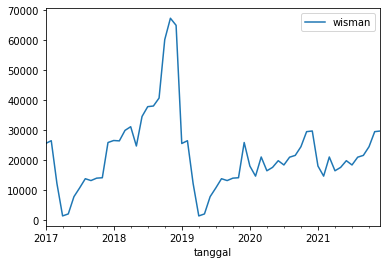

In [284]:
wisman_df.plot(
    kind = 'line'
)

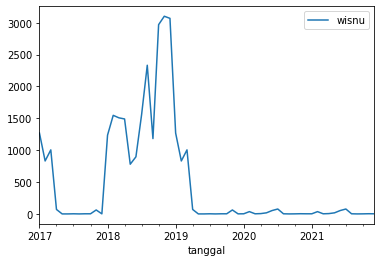

In [285]:
wisnu_df.plot(
    kind = 'line'
)

## Data Modelling

Split into train and test

In [293]:
number_of_test_wisnu = 6
wisnu_train_df = wisnu_df.iloc[:-number_of_test_wisnu]
wisnu_test_df = wisnu_df.iloc[-number_of_test_wisnu:]

number_of_test_wisma = 15
wisman_train_df = wisman_df.iloc[:-number_of_test_wisma]
wisman_test_df = wisman_df.iloc[-number_of_test_wisma:]

In [294]:
wisnu_train_index = wisnu_df.index <= wisnu_train_df.index[-1]
wisnu_test_index = wisnu_df.index > wisnu_test_df.index[-1]

wisman_train_index = wisman_df.index <= wisman_train_df.index[-1]
wisman_test_index = wisman_df.index > wisman_test_df.index[-1]

Make ARIMA model

In [295]:
def train_model(df, train_df, train_index, order, start_predict_index = 0, end_predict_index = -1, train_prediction_field = train_prediction_field):
  arima = ARIMA(train_df, order = order)
  arima_result = arima.fit()

  train_predictions = arima_result.predict(
      start = train_df.index[start_predict_index], end = train_df.index[end_predict_index]
  )

  df.loc[train_index, train_prediction_field] = train_predictions

  return arima_result, df

In [308]:
wisnu_arima_result, wisnu_df = train_model(
  wisnu_df,
  wisnu_train_df[wisnu_field],
  wisnu_train_index,
  (number_of_test_wisnu, 1, 1)
)

wisman_arima_result, wisman_df = train_model(
  wisman_df,
  wisman_train_df[wisman_field],
  wisman_train_index,
  (number_of_test_wisma, 0, 4)
)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [309]:
def plot_data_and_forecast(result, df, train_df, test_df, col_name, start_index = 1, n_test = 6):
  fig, ax = plt.subplots(figsize = (15, 5))
  ax.plot(df[col_name], label = 'data')

  train_pred = result.predict(start = train_df.index[start_index], end = train_df.index[-1])
  ax.plot(train_df.index[start_index:], train_pred, color = 'green', label = 'fitted')

  prediction_result = result.get_forecast(n_test)
  conf_int = prediction_result.conf_int()
  forecast = prediction_result.predicted_mean
  ax.plot(test_df.index, forecast, color = 'red', alpha = 0.3)
  
  ax.legend()

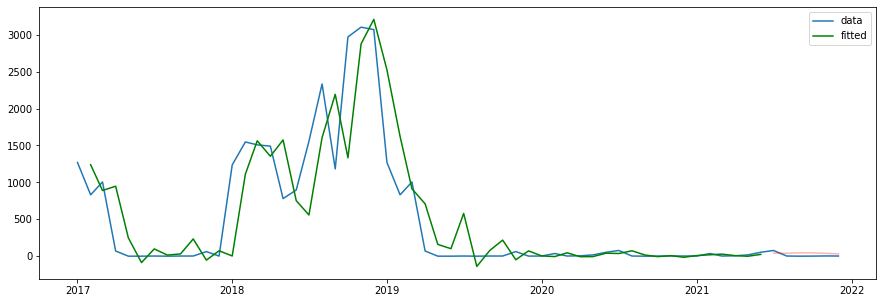

In [310]:
plot_data_and_forecast(
    wisnu_arima_result, 
    wisnu_df, 
    wisnu_train_df, 
    wisnu_test_df, 
    wisnu_field,
    n_test = number_of_test_wisnu
)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.



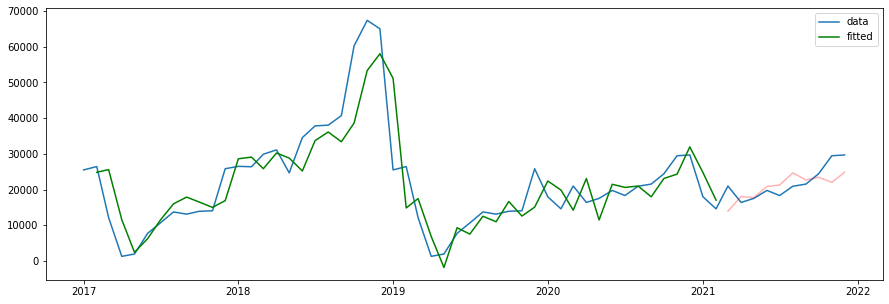

In [311]:
plot_data_and_forecast(
    wisman_arima_result, 
    wisman_df, 
    wisman_train_df, 
    wisman_test_df, 
    wisman_field,
    n_test = number_of_test_wisma
)

## Model Deployment

In [319]:
wisman_arima_result.save("arima_kunjungan_wisatawan_mancanegara_aceh.pickle")
wisnu_arima_result.save("arima_kunjungan_wisatawan_nusantara_aceh.pickle")

In [320]:
wisman_arima_result = sm.load('arima_kunjungan_wisatawan_mancanegara_aceh.pickle')
wisnu_arima_result = sm.load('arima_kunjungan_wisatawan_nusantara_aceh.pickle')

In [317]:
print(wisman_test_df)
print(wisnu_test_df)

            wisman  train_prediction
tanggal                             
2021-03-01   20998               NaN
2021-04-01   16391               NaN
2021-05-01   17527               NaN
2021-06-01   19759               NaN
2021-07-01   18332               NaN
2021-08-01   20930               NaN
2021-09-01   21533               NaN
2021-10-01   24434               NaN
2021-11-01   29468               NaN
2021-12-01   29689               NaN
            wisnu  train_prediction
tanggal                            
2021-07-01     77               NaN
2021-08-01      2               NaN
2021-09-01      0               NaN
2021-10-01      1               NaN
2021-11-01      3               NaN
2021-12-01      2               NaN


In [329]:
def create_time_series_df(start_date, end_date, freq = 'MS'):
  new_datetime_range = pd.date_range(
    start = date(2021, 1, 1), 
    end = date(2023, 1, 1), 
    freq = 'MS'
  )

  new_df = pd.DataFrame(
      columns = [tanggal_field, jumlah_field],
  )

  new_df[tanggal_field] = new_datetime_range

  return new_df

wisman_new_df = create_time_series_df(
  date(2021, 3, 1),
  date(2023, 1, 1)
)

wisnus_new_df = create_time_series_df(
  date(2021, 7, 1),
  date(2023, 1, 1)
)

print(wisman_new_df)

      tanggal jumlah
0  2021-01-01    NaN
1  2021-02-01    NaN
2  2021-03-01    NaN
3  2021-04-01    NaN
4  2021-05-01    NaN
5  2021-06-01    NaN
6  2021-07-01    NaN
7  2021-08-01    NaN
8  2021-09-01    NaN
9  2021-10-01    NaN
10 2021-11-01    NaN
11 2021-12-01    NaN
12 2022-01-01    NaN
13 2022-02-01    NaN
14 2022-03-01    NaN
15 2022-04-01    NaN
16 2022-05-01    NaN
17 2022-06-01    NaN
18 2022-07-01    NaN
19 2022-08-01    NaN
20 2022-09-01    NaN
21 2022-10-01    NaN
22 2022-11-01    NaN
23 2022-12-01    NaN
24 2023-01-01    NaN


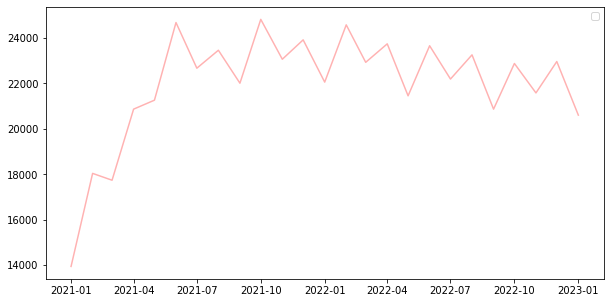

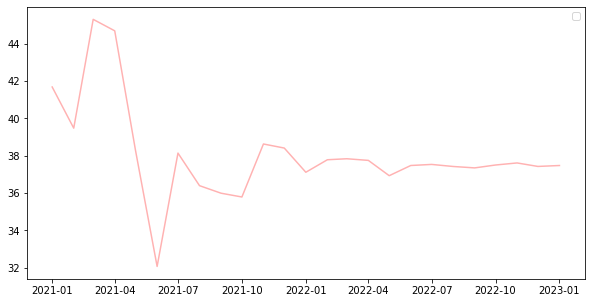

In [335]:
def plot_forecast_only(result, data_df, col_name, start_index = 0, n_samples = 58):
  fig, ax = plt.subplots(figsize = (10, 5))

  prediction_result = result.get_forecast(n_samples)
  prediction_result = prediction_result.predicted_mean
  prediction_result = prediction_result.reset_index()
  prediction_result = prediction_result.drop(["index"], axis = 1)

  print()
  
  ax.plot(data_df[tanggal_field], prediction_result, color = 'red', alpha = 0.3)
  
  ax.legend()

plot_forecast_only(
    result = wisman_arima_result,
    data_df = wisman_new_df,
    col_name = jumlah_field,
    n_samples = 25
)

plot_forecast_only(
    result = wisnu_arima_result,
    data_df = wisnus_new_df,
    col_name = jumlah_field,
    n_samples = 25
)